# <center>PROJET DE PYTHON : </center>
# <center>ANALYSE DE SENTIMENT ET DETECTION DE THEME SUR LES COMMENTAIRES DES LOGEMENTS DE AIRBNB PARIS <center>

------------------------------------
#### Auteurs :
- DIAGNE Elhadji Magatte
- DJIMENE TSOTSOP Staelle 
- DONGMO TIOGUIM Gilchrist Loïc 
-----------------------------------

## Introduction: contexte et justification du projet, Intéret, objectifs

Airbnb est une plateforme communautaire fondée en 2008 qui offre un service payant de location de logements de particuliers. Plus de 7 millions de logements sont actuellement proposés sur les plateformes de réservations en ligne d'Airbnb. On compte 150 millions d'utilisateurs d'Airbnb dans le monde et plus de 100 000 villes proposent des logements Airbnb dans plus de 220 pays. (https://news.airbnb.com/fr/fast-facts/) 

Ce service destiné aux voyageurs est d’autant plus bénéfique pour les touristes notamment dans les grandes métropoles où les services d’hôtellerie sont coûteux. C’est le cas de la ville de Paris qui est l’une des plus grandes destinations touristiques dans le monde (https://blogvoyages.fr/le-top-10-des-villes-les-plus-touristiques-du-monde/)

Compte tenu du grand nombre d’utilisateurs, il est important de prendre en compte au-delà des évaluations, les avis postés par ces derniers au niveau des commentaires afin de recueillir des informations sur le niveau d’appréciation et les préoccupations les plus fréquentes. 

Dans le cadre de cette étude, nous nous intéressons aux logements de la ville de Paris. 
Notre objectif sera dans un premier temps de recueillir les données sur les informations relatives aux logements et les commentaires postés pour chacune des annonces en utilisant la technique du webscrapping. Puis, grâce aux méthodes NLP, nous ferons une analyse de sentiment sur les commentaires et enfin une étape de modélisation permettra de déterminer les sujets sur lesquels portent les avis des utilisateurs en général avec une approche Topic modeling (LDA).


## Méthodologie utilisée

Afin d'atteindre les objectifs précedemment énoncés, nous avons utilisé les méthodes suivantes:
- **Web-Scraping** : il s'agit d'un processus d'extraction des données structurées sur le Web de manière automatisée. Cette opération nous permettra de constituer notre base de données. Les données du site web de Airbnb Paris seront extraites pour nos différentes analyses.
- **NLP (Natural Language Processing)**: il s'agit d'une méthode à l’intersection du Machine Learning et de la linguistique dont le but est d'extraire des informations et une signification d’un contenu textuel. Dans notre projet, cette méthode sera utilisée pour effectuer de la detection des langues dans les commentaires, les wordclouds, l'analyse sentimentale ainsi que la detection des différentes aspects des logements de Paris les plus abordés dans les commentaires (topic modeling).


### Extraction des données sur les logements de Airbnb Paris

 Les données de cette étude ont été scrappées à travers le site web de airbnb. L’url utilisé est un lien qui pointe vers une page htlm (https://www.airbnb.fr/s/Paris--France/homes?adults=1&place_id=ChIJD7fiBh9u5kcRYJSMaMOCCwQ&refinement_paths%5B%5D=%2Fhomes&checkin=2020-12-30&checkout=2020-12-31) contenant la recherche sur les annonces de logements dans la ville de Paris pour la date du 30 Décembre 2020. Ce travail a nécessité l’installation de packages telsque beautifulsloop et selenium ainsi qu’un webdriver (chromedriver dans notre cas).
 
L’extraction des données a été effectuée le 7 décembre 2020 et nous avons obtenu deux bases de données :

 
 * la base des informations sur chaque logement *final_dataListing*(https://github.com/Gil97-tech/TP2A/blob/master/final_dataListing.csv)
 * la base des commentaires sur chaque logement *final_database* (https://github.com/Gil97-tech/TP2A/blob/master/final_database.csv)

### Importation de tous les packages necessaires pour les analyses

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import time
import datetime
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import re
import string
import nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from  nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('punkt') # pour gérer les ponctuation 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\djime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\djime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importation des differentes bases de données depuis le dépot Github

In [10]:
df_withcomment = pd.read_csv("https://raw.githubusercontent.com/Gil97-tech/TP2A/master/final_database.csv")
df_listings = pd.read_csv('https://raw.githubusercontent.com/Gil97-tech/TP2A/master/final_dataListing.csv')

### Description de chaque base

In [16]:
print(df_listings.shape)
print(df_listings.columns)
df_listings.head(3)

(285, 8)
Index(['Unnamed: 0', 'title', 'link', 'nbComments', 'prix', 'topRow',
       'evaluation', 'roomInfo'],
      dtype='object')


,Unnamed: 0,title,link,nbComments,prix,topRow,evaluation,roomInfo
0,1,The Place To Be // Trendy Eiffel Tower Apartme...,http://airbnb.com/rooms/46465358?adults=1&chec...,pas de commentaire,Prix :190€ / nuit,Logement entier à Tour Eiffel - Champ de Mars,pas d'évaluation,2 voyageurs · Studio · 1 lit · 1 salle de bain
1,2,La Chambre & Piscine - null - Paris,http://airbnb.com/rooms/31868079?adults=1&chec...,(174),Prix :120€ / nuit,Chambre d'hôtel à Vaugirard,4.84,2 voyageurs · 1 chambre · 1 lit · 1 salle de bain
2,3,Secret Deluxe Room in the heart of Paris - nul...,http://airbnb.com/rooms/33703579?adults=1&chec...,(18),Prix :97€ / nuit,Chambre d'hôtel à 9e arrondissement,4.61,2 voyageurs · 1 chambre · 1 lit · 1 salle de bain


<p style='text-align: justify;'> Nous avons extrait les données sur 285 logements de Airbnb Paris. Les informations extraites portent sur le nombre de commentaires (nbComments), l'évaluation (evaluation), le lien vers le logement (link), le titre du logement (title), la description du logement (TopRow), le nombre de chambre, de lit, de douche (RommInfo) ainsi que le prix (prix)</p>

In [18]:
print(df_withcomment.shape)
print(df_withcomment.columns)
df_withcomment.tail(5)

(18087, 2)
Index(['index', 'commentaires'], dtype='object')


,index,commentaires
18082,285,"L'appartement est bien situé dans Paris, de pl..."
18083,285,"Appartement bien situé, propre et bien équipé...."
18084,285,"Excellent accueil, convivial et chaleureux. Em..."
18085,285,"Beautiful, clean and cozy apartment with a lit..."
18086,285,"Extremely responsive, kind host, and a lovely ..."


Sur l'ensemble des 285 logements, au total 18087 commentaires ont été extraits. la base est constituée d'autant de ligne qu'il ya de commentaires. La colonne index permet de distinguer les commentaires de chaque logement.

## NLP (Natural Language Processing)

<p style='text-align: justify;'> Seule la base des commentaires est utilisée dans la suite. L'étape suivante consiste à detecter les langues présentent dans les commentaires, réaliser les wordclouds, effectuer l'analyse sentimentale ainsi le topic modeling </p>

### Detection des langues

In [4]:
from langdetect import detect
# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [5]:
from langdetect import detect
# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

Tous les logements qui n'ont pas de commentaires sont supprimés

In [ ]:
df_withcomment=df_withcomment[df_withcomment['commentaires']!='pas de commentaire']

In [7]:
%%time
df_withcomment['language'] = df_withcomment['commentaires'].apply(language_detection)

Wall time: 3min 26s


In [9]:
print("Au total " + str(len(df_withcomment.language.unique())) + " sont détectés")
df_withcomment.language.value_counts().head(20)

fr       9528
en       6417
es        569
de        254
ko        195
pt        139
it        128
ca        121
nl        109
zh-cn      95
ro         70
cy         58
id         55
ru         49
ja         40
af         21
so         16
da         13
cs         12
pl         12
Name: language, dtype: int64

Un total de 37 langues sont détectés dans notre base. 

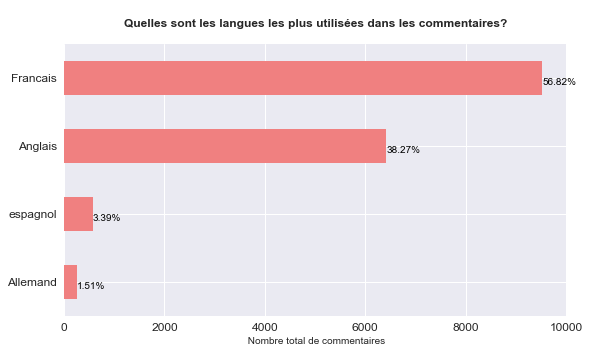

In [87]:
ax = df_withcomment.language.value_counts().head(4).plot(kind='barh', figsize=(9,5), color="lightcoral", 
                                             fontsize=12);

ax.set_title("\nQuelles sont les langues les plus utilisées dans les commentaires?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Nombre total de commentaires", fontsize=10)
ax.set_yticklabels(['Francais','Anglais','espagnol', 'Allemand'])
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')
ax.invert_yaxis()

Le top 4 des langues les plus utilisées dans les commentaires sont le francais (56.82%), l'anglais (38,37%), l'espagnol et l'allemand.  
Nous allons nous restreindre aux momentaires en francais et en anglais dans la suite.

## Visualisation des données avec les WordClouds (Nuage des mots)

<p style='text-align: justify;'>  Dans la suite, les analyses sont faites suivant la langue. Nous constituons ainsi deux bases de données. l'une contient les commentaires en francais et l'autre, les commentaires en anglais. </p>

In [14]:
df_eng = df_withcomment[(df_withcomment['language']=='en')]
df_fr  = df_withcomment[(df_withcomment['language']=='fr')]

L'analyse des données textuelles passent par une étape primordiale qui est le traitement. Ce traitement s'effectue en plusieurs étapes: 
- **Tokenisation** : cette étape consiste à scinder chaque phrase en mots ou tokens.
- **Supression des Stop-words** : "mots vide" en français ce sont principalement des mots caractéristiques d'une langue comme les prépositions, les articles, les pronoms.  Ils ne nous seront pas utiles pour les analyses.
- **Lemmatisation** : C'est le procédé par lequel on regroupe des mots de la même famille afin de pouvoir les analyser comme ayant un sens unique



## Definition des Stop-words

Les Stop-words anglais sont ceux du package *gensim* tandis que les stop-words francais sont ceux du package *nlk*. Ces derniers ont été enrichis par d'autres stop-words que nous avons défini.

In [22]:
stop_word_en = STOPWORDS
stop_word_fr = set(stopwords.words('french'))
add_stop_words = ['très', 'trés', 'tres', 'je', 'à', 'a','nous','si','tout','Nous','Une','Je','alors','Tres']
stop_word_fr.update(add_stop_words)

Fonction pour contruire le wordcloud

In [103]:
def plot_wordcloud(df_com, langue,stop_word):
    wordcloud=WordCloud(max_font_size=None, max_words=200, background_color="lightgrey",width=3000, height=2000, stopwords=stop_word).generate(str(df_com.values))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(langue + ' Comments\n', fontsize=18, fontweight='bold')

## WordCloud des commentaires en francais

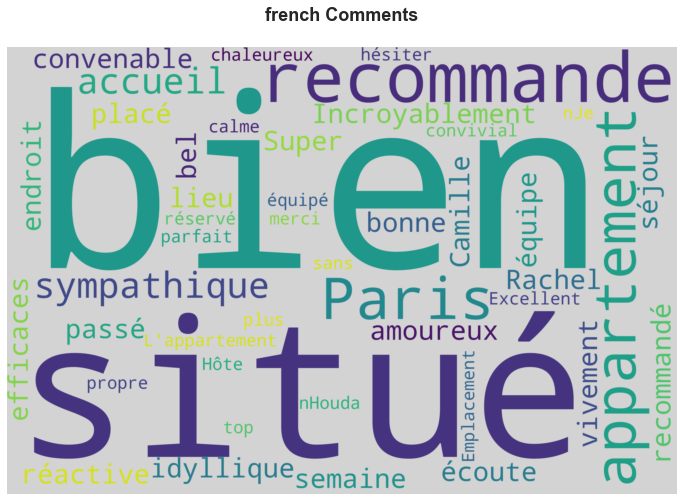

In [99]:
plt.figure(figsize=(12, 10))
plot_wordcloud(df_fr.commentaires, "french",stop_word_fr)
plt.show()

On peut remarquer que les mots les plus fréquemment utilisés dans les commentaires (en francais) sur les logements de Airbnb Paris sont "bien", "situé", "recommande", "Paris", "Appartement", "sympatique", ...

## WordCloud des commentaires en anglais

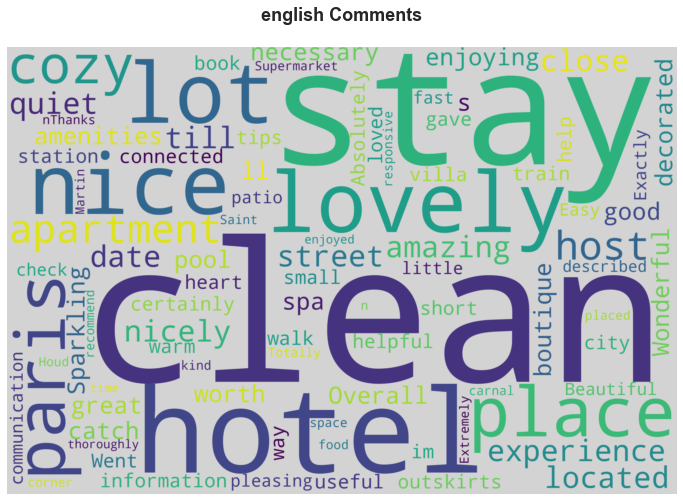

In [101]:
plt.figure(figsize=(12, 10))
plot_wordcloud(df_eng.commentaires, "english",stop_word_en)
plt.show()

On peut remarquer également que les mots les plus fréquemment utilisés dans les commentaires (en anglais) sur les logements de Airbnb Paris sont: "clean", "hotel", "stay", "lovely", "nice", etc

## Analyse sentimentale des commentaires 

L’analyse des sentiments consiste essentiellement à juger le sentiment qui se cache derrière un écrit. Le processus consiste donc à prendre un morceau de texte, qu’il s’agisse d’une phrase ou d’un article complet, et à analyser l’émotion que l’auteur exprime.  
Dans notre analyse, nous allons calculer pour chaque commentaire, le score de sentiment positif, négatif ou neutre qu'il exprime.
Nous allons par la suite classer chaque commentaire en fonction du sentiment positif, négatif ou neutre.

In [84]:
def score_neg(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value
def score_neu(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value
def score_pos(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value
def score_compound(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value


Les variables comportant les scores positifs, négatifs, neutres et composés (compound score) sont créer dans chaque base.  

In [85]:
%%time
df_fr['sentiment_neg'] = df_fr['commentaires'].apply(score_neg)
df_fr['sentiment_neu'] = df_fr['commentaires'].apply(score_neu)
df_fr['sentiment_pos'] = df_fr['commentaires'].apply(score_pos)
df_fr['sentiment_compound'] = df_fr['commentaires'].apply(score_compound)

Wall time: 21.3 s


In [88]:
%%time

df_eng['sentiment_neg'] = df_eng['commentaires'].apply(score_neg)
df_eng['sentiment_neu'] = df_eng['commentaires'].apply(score_neu)
df_eng['sentiment_pos'] = df_eng['commentaires'].apply(score_pos)
df_eng['sentiment_compound'] = df_eng['commentaires'].apply(score_compound)

Wall time: 24 s


Pour poursuivre les analyses, une base unique est constituée par concaténation des bases des commentaires/scores en francais et en englais

In [89]:
## scores globaux pour l'anglais et francais
df=pd.concat([df_fr,df_eng])

## Histogramme selon la nature du score

In [90]:
def histogram(df):
    fig, axes = plt.subplots(2, 2, figsize=(10,8))
    df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
    axes[0,0].set_title('Negative Sentiment Score')
    df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
    axes[0,1].set_title('Neutral Sentiment Score')
    df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
    axes[1,0].set_title('Positive Sentiment Score')
    df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
    axes[1,1].set_title('Compound')
    fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
    fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')
    plt.suptitle('Analyse sentimentale des commentaires de AIRBNB Paris\n\n', fontsize=12, fontweight='bold');


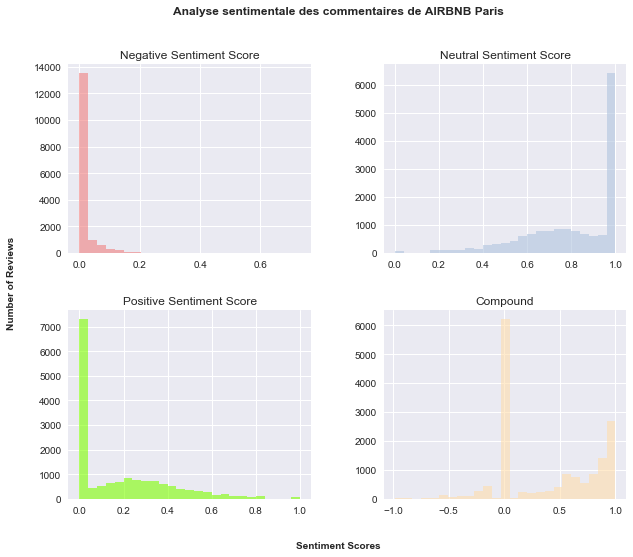

In [91]:
histogram(df)

on peut remarquer que près de 14000 commentaires ont un score négatif nul; un peu plus de 6000 commentaires ont un score neutre égal à 1; un peu plus de 7000 commentaires ont un score neutre égal à 0. Aussi, près de 500 commentaires ont un score positif supérieur à 0,5.  
Aussi, plus de 6000 commentaires ont un score composé nul; près de 3000 commentaire ont un score composé proche de 1 et très peu de commentaires ont un score composé nul

 ## comparaison des commentaires positifs et négatifs

Les scores composés ou compound_score varient entre *-1 et 1* telle que (d'après la littérature):
- **sentiment positif**: si compound_score>=0.05
- **sentiment neutre**: si compound_score between -0.05 and 0.05
- **sentiment negatif**: si compound_score<=-0.05  
Les commentaires sont donc classés suivant cette norme (suivant la variable *Nature_commen*).                                                                       

In [92]:
## creation d'une nouvelle variable suivant la variable compound
df["Nature_commen"]=np.where(df.sentiment_compound <= -0.05,"negatif", np.where((-0.05 <= df.sentiment_compound) & (df.sentiment_compound <= 0.05),"neutre","positif"))

In [93]:
def Comparaison(df): 
    prop=df["Nature_commen"].value_counts(normalize=True).tolist()
    neg =prop[2]*100
    mid = prop[1]*100
    pos = prop[0]*100
    names = ['commentaires positifs', 'commentaires neutres','commentaires négatifs']
    size = [neg, mid, pos]
    plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
            autopct='%.2f%%', pctdistance=0.8,
            wedgeprops={'linewidth':7, 'edgecolor':'white' })
    my_circle = plt.Circle((0,0), 0.6, color='white')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    fig.gca().add_artist(my_circle)
    plt.show()

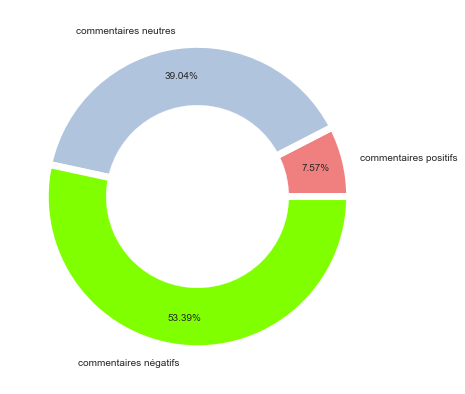

In [94]:
Comparaison(df)

on remarque que 53,39% des commentaires sur les logements de Airbnb Paris sont positifs, 39,04% sont neutres et seulement 7,57% sont des commentaires négatifs.

## Wordclouds des commentaires positifs et négatifs

Des wordclouds par langue sont faits.

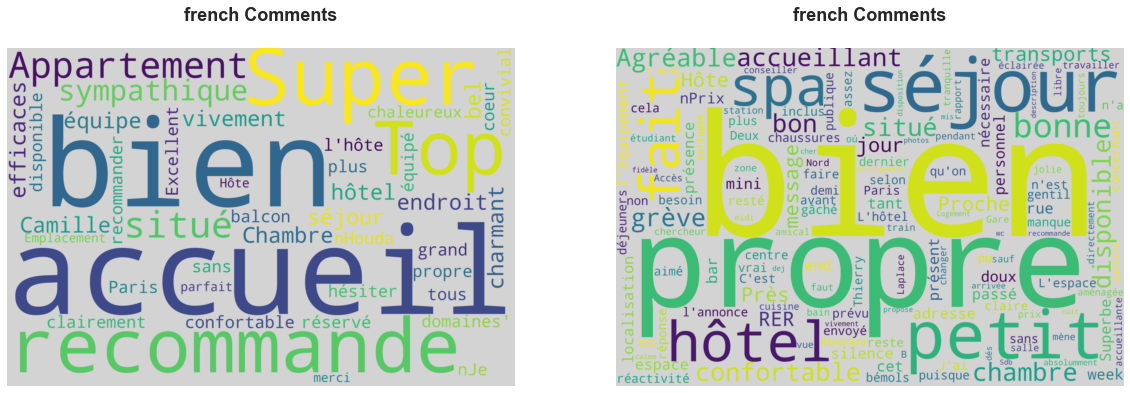

In [104]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plot_wordcloud(df[(df.language=="fr") & (df.Nature_commen=="positif") ].commentaires, "french",stop_word_fr)
plt.subplot(1,2,2)
plot_wordcloud(df[(df.language=="fr") & (df.Nature_commen=="negatif") ].commentaires, "french",stop_word_fr)
plt.show()

Le wordcloud des commentaires positifs (en francais) sur les logements de Airbnb Paris montre la dominance des mots suivants: "bien", "acceuil", "recommande", "super", "top", etc  
Pour ce qui est des commentaires négatifs, les mots les plus fréquents sont : "bien", "propre", "petit", "séjour". les termes positifs qui apparaissent sont dus aux adverbes et pronoms de négation qui ont été retirés au niveau des stopWords. 

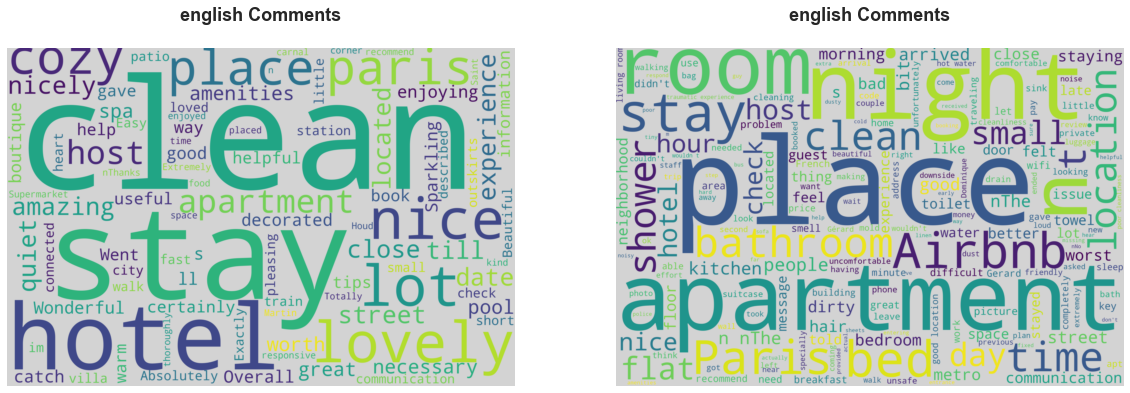

In [111]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plot_wordcloud(df[(df.language=="en") & (df.Nature_commen=="positif") ].commentaires, "english",stop_word_en)
plt.subplot(1,2,2)
plot_wordcloud(df[(df.language=="en") & (df.Nature_commen=="negatif") ].commentaires, "english",stop_word_en)

Le wordcloud des commentaires positifs (en anglais) sur les logements de Airbnb Paris montre la dominance des mots suivants: "clean", "stay", "nice", "lovely", "hotel", etc  
Pour ce qui est des commentaires négatifs, les mots les plus fréquents sont : "place", "apartment", "night", "small". En outre, on peu remarquer les termes négatifs suivants: "close", "unsafe", "dirty", "problem", "little", "bad", etc

## Top 20 des termes positifs et négatifs les plus utilisés 

In [124]:
def visualisition_pos(df,stop_word):  
    vectorizer = CountVectorizer(stop_words = frozenset(stop_word))
    docs = vectorizer.fit_transform(df)
    features = vectorizer.get_feature_names()
    set_palette('pastel')
    plt.title('Top 20 des mots les plus fréquents dans la liste des commentaires positifs \n', fontweight='bold')
    visualizer = FreqDistVisualizer(features=features, n=20)
    visualizer.fit(docs)
    visualizer.poof;

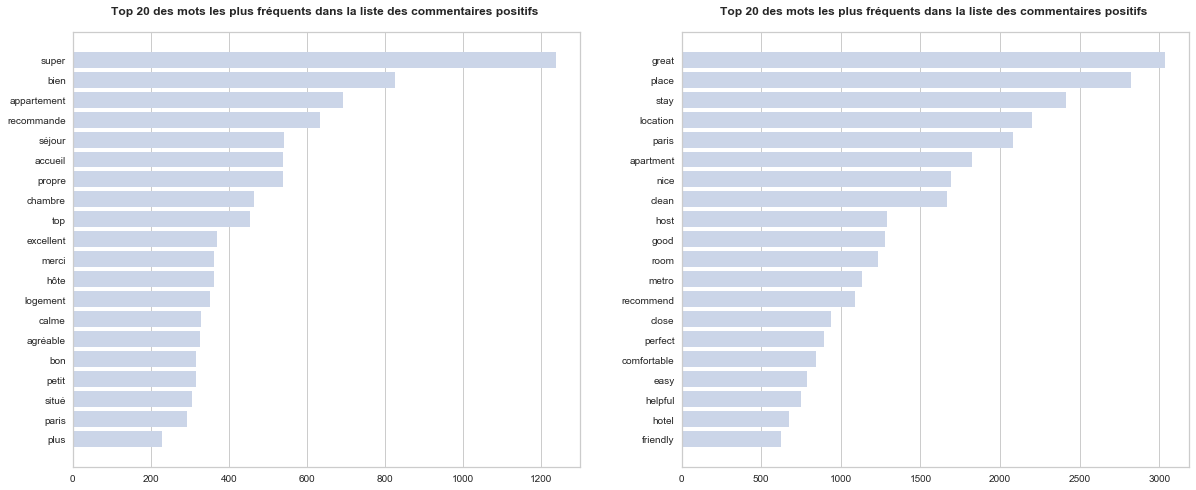

In [126]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
visualisition_pos(df[(df.language=="fr") & (df.Nature_commen=="positif") ].commentaires,stop_word_fr)
plt.subplot(1,2,2)
visualisition_pos(df[(df.language=="en") & (df.Nature_commen=="positif") ].commentaires,stop_word_en)


Les adjectifs positifs les plus utilisés dans les commentaires pour qualifier les logements de Airbnb Paris sont: "Super", "bien","recomande", "propre", "top", "excellent", "calme", "agréable", "great", "nice", "clean", "good", "perfect", "confortable".

NameError: name 'visualisition_pos' is not defined

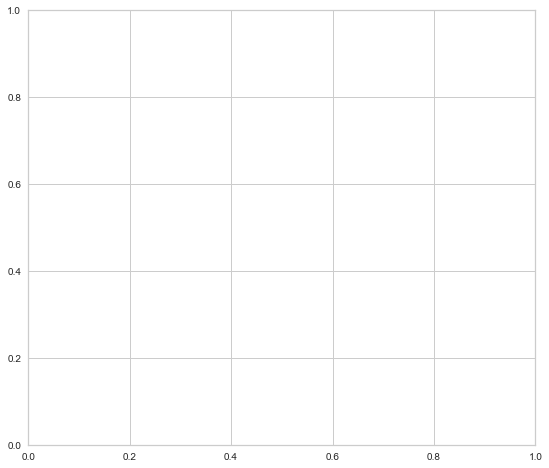

In [25]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
visualisition_pos(df[(df.language=="fr") & (df.Nature_commen=="negatif")].commentaires,stop_word_fr)
plt.subplot(1,2,2)
visualisition_pos(df[(df.language=="en") & (df.Nature_commen=="negatif") ].commentaires,stop_word_en)

Les adjectifs négatifs les plus utilisés dans les commentaires pour qualifier les logements de Airbnb Paris sont: "petit", "small", "flat". la redondance des termes positifs a été justifiée plus haut.

## Topic modeling (LDA)

Il est question dans cette partie d'analyser les différentes aspects (propreté, localisation, acceuil, etc) des logements de Airbnb Paris les plus abordés dans les commentaires grace au modèle LDA (Latent Dirichlet Allocation).

In [ ]:
# Nous allons nous restreindre aux commentaires négatifs, positifs en anglais et en français pour réaliser le topic modeling 

In [136]:
fr_pos_comments =df[(df.language=="fr") & (df.Nature_commen=="positif")].commentaires.tolist()
fr_neg_comments =df[(df.language=="fr") & (df.Nature_commen=="negatif")].commentaires.tolist()
en_pos_comments =df[(df.language=="en") & (df.Nature_commen=="positif")].commentaires.tolist()
en_neg_comments =df[(df.language=="en") & (df.Nature_commen=="negatif")].commentaires.tolist()

In [141]:
langue = ['french','english']

def cleaning_words(text,langue,stop_words):
    text = text.lower()
    words = word_tokenize(text, language=langue)
    ws = [word for word in words if word.isalnum()]
    new_ws = [w for w in ws if w not in stop_words]
    return new_ws


def LDA_model(list_com,nb_topic,nb_words,langue,stop_words):
    corpus = []
    for i in range(len(list_com)):
        corpus.append(cleaning_words(list_com[i],langue,stop_words))
    dictionary = corpora.Dictionary(corpus)
    bow = [dictionary.doc2bow(text) for text in corpus]
    ldamodel = gensim.models.ldamodel.LdaModel(bow, num_topics=nb_topic, id2word=dictionary, passes=15,random_state=10)
    topics = ldamodel.print_topics(num_words=nb_words)
    for topic in topics:
        print(topic)
    



### Résultats LDA model pour les commentaires positifs

In [143]:
LDA_model(fr_pos_comments,5,5,langue[0],stop_word_fr)

(0, '0.012*"and" + 0.010*"the" + 0.007*"was" + 0.007*"in" + 0.006*"paris"')
(1, '0.047*"super" + 0.024*"hôte" + 0.022*"recommande" + 0.021*"accueil" + 0.020*"séjour"')
(2, '0.040*"super" + 0.030*"bien" + 0.021*"appartement" + 0.021*"recommande" + 0.020*"excellent"')
(3, '0.037*"bien" + 0.022*"super" + 0.017*"propre" + 0.015*"appartement" + 0.013*"studio"')
(4, '0.016*"calme" + 0.015*"chambre" + 0.014*"bien" + 0.014*"super" + 0.013*"paris"')


In [144]:
LDA_model(en_pos_comments,5,5,langue[1],stop_word_en)

(0, '0.055*"great" + 0.040*"location" + 0.038*"place" + 0.037*"stay" + 0.036*"host"')
(1, '0.037*"apartment" + 0.026*"paris" + 0.021*"location" + 0.020*"stay" + 0.018*"great"')
(2, '0.037*"place" + 0.034*"nice" + 0.025*"station" + 0.024*"room" + 0.024*"stay"')
(3, '0.026*"room" + 0.022*"floor" + 0.016*"bathroom" + 0.013*"shower" + 0.013*"2"')
(4, '0.018*"paris" + 0.013*"home" + 0.011*"s" + 0.011*"place" + 0.010*"great"')


### Résultats LDA model pour les commentaires négatifs

In [142]:
LDA_model(fr_neg_comments,5,5,langue[0],stop_word_fr)

(0, '0.022*"bien" + 0.019*"merci" + 0.016*"propre" + 0.016*"accueil" + 0.014*"chambre"')
(1, '0.019*"parfait" + 0.018*"bien" + 0.016*"rien" + 0.016*"appartement" + 0.014*"propre"')
(2, '0.033*"bien" + 0.023*"logement" + 0.013*"propre" + 0.012*"fait" + 0.011*"séjour"')
(3, '0.018*"chambre" + 0.014*"bien" + 0.009*"lit" + 0.009*"appartement" + 0.009*"propre"')
(4, '0.016*"bien" + 0.015*"recommande" + 0.013*"parfait" + 0.013*"agréable" + 0.012*"chambre"')


In [145]:
LDA_model(en_neg_comments,5,5,langue[1],stop_word_en)

(0, '0.017*"bed" + 0.015*"place" + 0.011*"t" + 0.010*"paris" + 0.010*"apartment"')
(1, '0.015*"night" + 0.012*"apartment" + 0.011*"stay" + 0.010*"place" + 0.010*"host"')
(2, '0.013*"place" + 0.012*"bathroom" + 0.012*"night" + 0.010*"kitchen" + 0.009*"floor"')
(3, '0.020*"room" + 0.014*"place" + 0.011*"stay" + 0.009*"hotel" + 0.008*"bathroom"')
(4, '0.018*"apartment" + 0.013*"airbnb" + 0.008*"experience" + 0.008*"s" + 0.008*"staying"')


### SCORE MOYEN PAR LISTING

In [146]:
df_eng1 = df_eng.copy()
df_fr1= df_fr.copy()
## score des commentaires en anglais
df1=df_eng1[["index","sentiment_neg","sentiment_neu","sentiment_pos","sentiment_compound"]]
df1=df1.groupby("index").agg("mean")

## score des commentaires en francais
df2=df_fr1[["index","sentiment_neg","sentiment_neu","sentiment_pos","sentiment_compound"]]
df2=df2.groupby("index").agg("mean")

## concaténation
dfScore=pd.concat([df1, df2])
dfScore=dfScore.groupby("index").agg("mean")

In [147]:
## transformer la variable compound score
dfScore.loc[:,"scoreT"] =dfScore.loc[:,"sentiment_compound"]*2+3

In [148]:
dfScore.loc[:,"scoreT"].describe()

count    220.000000
mean       3.743294
std        0.359632
min        2.799700
25%        3.575350
50%        3.850914
75%        3.960942
max        4.758667
Name: scoreT, dtype: float64

In [149]:
dfScore.head()

,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,scoreT
index,,,,,
1,0.000000,1.000000,0.000000,0.000000,3.000000
2,0.011880,0.730183,0.257937,0.524864,4.049729
3,0.007100,0.843833,0.149067,0.401697,3.803393
7,0.016446,0.570892,0.412666,0.264122,3.528244
8,0.022502,0.724288,0.253217,0.404206,3.808412


## FUSION DES BASES ET COMPARAISON 

In [151]:
def cleanRoomInfo(df):
    df.loc[:, "guests"] = df.loc[:, "roomInfo"].str.split(" · ", n = 0, expand = True)[0].str.replace(" guest", "").str.replace("s", "")
    df.loc[:, "bedrooms"] = df.loc[:, "roomInfo"].str.split(" . ", n = 0, expand = True)[1].str.replace(" bedroom", "").str.replace("s", "")
    df.loc[:, "beds"] = df.loc[:, "roomInfo"].str.split(" . ", n = 0, expand = True)[2].str.replace(" bed", "").str.replace("s", "")
    df.loc[:, "bathrooms"] = df.loc[:, "roomInfo"].str.split(" . ", n = 0, expand = True)[3].str.replace(" bath", "").str.replace("s", "")
    df.loc[:, "guests"] = df.loc[:, "guests"].str.replace(" voyageur", "").str.replace("s", "") 
    df.loc[:, "bedrooms"] = df.loc[:, "bedrooms"].str.replace(" chambre", "").str.replace("s", "") 
    df.loc[:, "beds"]=df.loc[:, "beds"].str.replace(" lit", "").str.replace("s", "") 
    df.loc[:, "bathrooms"]=df.loc[:, "bathrooms"].str.replace(" alle de bain", "").str.replace("s", "")
    df.loc[:, "guests"] = pd.to_numeric(df.guests, errors = 'coerce')
    df.loc[:, "beds"] = pd.to_numeric(df.beds, errors = 'coerce')
    df.loc[:, "bedrooms"] = pd.to_numeric(df.bedrooms.str.split(" ", n = 0, expand = True)[0], errors = "coerce")
    df.loc[:, "bathrooms"] = pd.to_numeric(df.bathrooms.str.split(" ", n = 0, expand = True)[0], errors = "coerce")
    return df.drop("roomInfo", axis = 1)
#df_listings=cleanRoomInfo(df_listings)
#2 voyageurs · 1 chambre · 1 lit · 1 salle de bain


df_listings.loc[:, "pricepernight"] = df_listings.loc[:, "prix"].str.split("Discounted", n = 0, expand = True)[0].str.replace("$", "/").str.split("/",  n = 0, expand = True)[1]
df_listings.loc[(df_listings.pricepernight==' nuit'), "pricepernight"] = df_listings.loc[:, "prix"].str.split("€Prix", n = 0, expand = True)[0].str.replace(":", "/").str.split("/",  n = 0, expand = True)[1]
df_listings["pricepernight"] = df_listings["pricepernight"].str.strip('€ ')

df_listings['nbComments'] = df_listings['nbComments'].str.replace(r'\D', '')
df_listings.loc[df_listings['nbComments'] ==''] = 0


# on convertit en numeric
df_listings.loc[:, "pricepernight"] = pd.to_numeric(df_listings.pricepernight)
df_listings.loc[:, "nbComments"] = pd.to_numeric(df_listings.nbComments)
df_listings['evaluation'] = df_listings['evaluation'].astype(float)
df_listings=cleanRoomInfo(df_listings)


In [152]:
df_listings.head()

,Unnamed: 0,title,link,nbComments,prix,topRow,evaluation,pricepernight,guests,bedrooms,beds,bathrooms
0,0,0,0,0,0,0,0.00,0,NaN,NaN,NaN,NaN
1,2,La Chambre & Piscine - null - Paris,http://airbnb.com/rooms/31868079?adults=1&chec...,174,Prix :120€ / nuit,Chambre d'hôtel à Vaugirard,4.84,120,2.0,1.0,1.0,1.0
2,3,Secret Deluxe Room in the heart of Paris - nul...,http://airbnb.com/rooms/33703579?adults=1&chec...,18,Prix :97€ / nuit,Chambre d'hôtel à 9e arrondissement,4.61,97,2.0,1.0,1.0,1.0
3,0,0,0,0,0,0,0.00,0,NaN,NaN,NaN,NaN
4,0,0,0,0,0,0,0.00,0,NaN,NaN,NaN,NaN


In [153]:
df_listings.insert(0, 'ID_listings', range(1,len(df_listings)+1))
df_listings = df_listings.set_index('ID_listings')
df_listings.shape

(285, 12)

## fusion des bases

In [154]:
## base pour la comparaison
df_listingsF=df_listings.copy()
df_listingsF=df_listingsF.join(dfScore, how='inner')

In [155]:
df_listingsF.head()

,Unnamed: 0,title,link,nbComments,prix,topRow,evaluation,pricepernight,guests,bedrooms,beds,bathrooms,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,scoreT
1,0,0,0,0,0,0,0.00,0,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,3.000000
2,2,La Chambre & Piscine - null - Paris,http://airbnb.com/rooms/31868079?adults=1&chec...,174,Prix :120€ / nuit,Chambre d'hôtel à Vaugirard,4.84,120,2.0,1.0,1.0,1.0,0.011880,0.730183,0.257937,0.524864,4.049729
3,3,Secret Deluxe Room in the heart of Paris - nul...,http://airbnb.com/rooms/33703579?adults=1&chec...,18,Prix :97€ / nuit,Chambre d'hôtel à 9e arrondissement,4.61,97,2.0,1.0,1.0,1.0,0.007100,0.843833,0.149067,0.401697,3.803393
7,7,Logement Privé Relaxant avec grand Jaccusi &Ja...,http://airbnb.com/rooms/15443356?adults=1&chec...,291,Prix :129€ / nuit,Chambre privée à Rosny-sous-Bois,4.68,129,2.0,1.0,1.0,NaN,0.016446,0.570892,0.412666,0.264122,3.528244
8,8,"Chambre déco industrielle ""Amsterdam"", accès S...",http://airbnb.com/rooms/18984480?adults=1&chec...,185,Prix :86€ / nuit,Chambre dans un boutique-hôtel à 17e arrondiss...,4.58,86,2.0,1.0,1.0,1.0,0.022502,0.724288,0.253217,0.404206,3.808412


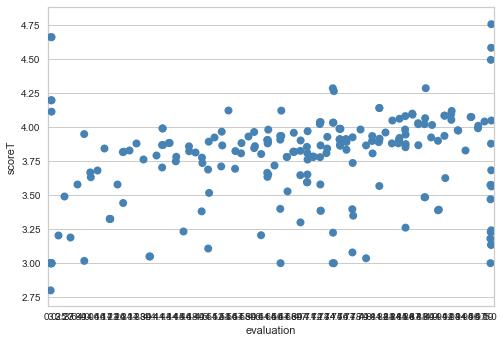

In [156]:
## Comparaison des scores à l'évaluation
sns.stripplot(x='evaluation', y='scoreT',data=df_listingsF, s = 8, color = "steelblue")
plt.show()

In [185]:
import numpy as np
import scipy.stats

In [188]:
X = np.array(df_listingsF["scoreT"])
Y = np.array(df_listingsF["evaluation"])
scipy.stats.pearsonr(X,Y)
scipy.stats.spearmanr(X,Y)


SpearmanrResult(correlation=0.30830062928544066, pvalue=3.1495269842078417e-06)

In [189]:
scipy.stats.kendalltau(X,Y)

KendalltauResult(correlation=0.23989237710780645, pvalue=1.755354968107199e-07)

In [181]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



lmodellineaire = linear_model.LinearRegression()
lmodellineaire.fit(X,Y)

ValueError: Expected 2D array, got 1D array instead:
array=[3.         4.04972882 3.80339333 3.52824353 3.80841175 3.95946309
 3.88375826 4.05471742 4.04652143 3.03603077 3.86634463 3.24185
 4.28716667 3.63508532 4.038065   3.66502246 4.08568095 3.9754042
 3.689171   3.92535302 3.865487   4.07605196 3.80990985 3.93593333
 3.74945501 3.85973744 3.30010909 3.2083     4.038065   3.93593333
 4.08568095 3.8655252  3.76869908 3.73659778 3.90309778 3.20574808
 4.06686333 3.44270833 3.18093333 3.62612727 3.88133179 3.22951111
 3.         3.59558611 3.89051089 4.03021602 3.88770556 3.84654853
 3.22951111 3.23792836 4.01102507 3.94692946 3.90617083 4.09349249
 3.834785   3.91099918 3.78324118 4.01687056 3.19085    3.81970807
 3.86075    3.57932667 3.88770556 3.83371408 3.38126667 3.86633333
 3.49552143 3.59558611 3.2613978  3.         3.3996     3.8942042
 3.98651949 4.08229    4.10062952 3.83000625 4.07605196 3.0492
 3.91099918 3.86808321 3.57535    3.38569524 3.         3.86958939
 3.89240884 3.78324118 3.88453333 3.91368838 3.92122896 3.51693125
 3.73735833 3.         3.56473333 3.38934444 3.72221888 4.6632
 3.32572585 3.82357436 3.64764021 3.89066481 4.06259685 3.78324118
 3.87671319 3.349525   3.88770556 3.91099918 3.58553618 3.
 3.92640155 3.4703     3.48508375 3.93683567 3.90617083 3.
 3.39356    3.10771739 3.0492     3.90050865 3.48508375 3.
 4.1148     4.09685244 3.88453333 3.86958939 3.90214286 3.38569524
 3.39705515 3.88160075 3.82016923 3.934595   3.70410148 3.81970807
 3.8991046  3.8559     3.87935556 3.9669     3.86653016 3.13486667
 3.76262939 4.03405714 3.99139796 3.58248333 3.32542885 3.99139796
 3.82669866 3.68353333 3.97848077 4.12738    4.03405714 3.32572585
 3.         3.57535    3.84362496 3.65256588 3.69481    3.9887121
 3.65258333 3.79355176 3.78177596 4.1988     4.6632     3.87616688
 3.         3.85345833 3.96537931 3.80781083 3.         4.14174667
 2.7997     3.13486667 3.5677478  3.88128867 3.78011786 3.98237448
 4.04975238 4.5854     4.12266667 3.77701667 3.84837002 3.22433333
 4.1988     3.71189032 4.02396333 3.07905515 3.98331532 3.9887121
 3.9887121  3.90674905 3.         3.88204497 3.78177596 3.81666268
 3.9501     3.91636923 3.01685833 4.14174667 3.         3.66782412
 3.93547888 3.         3.82480649 4.4964     3.90901541 3.99277526
 4.02299    4.75866667 4.28756667 3.78302586 4.02300233 3.68408596
 3.96740905 3.93211941 3.80930066 4.12008754 3.92950948 3.63256529
 3.97093622 3.81731111 3.81995831 4.26646667].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.